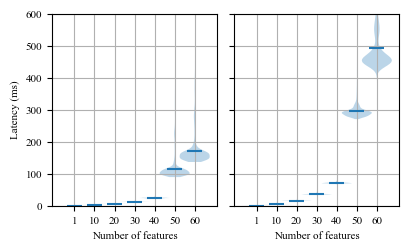

In [1]:
import datetime as dt
import sys

from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.subplot.left"] = 0.10
plt.rcParams["figure.subplot.bottom"] = 0.2
plt.rcParams["figure.subplot.right"] = 0.95
plt.rcParams["figure.subplot.top"] = 0.85
sys.path.insert(
    1, str(Path().resolve().parent / "publications/ilustrate/pc2023")
)
from plot_matplotlib import set_size, PLOT_WIDTH  # noqa: E402

results_path = ".results/scalability/"
fig, axs = plt.subplots(1, 2, figsize=set_size(PLOT_WIDTH), sharey=True)
for i, result_file in enumerate(
    ["latencies_detection.csv", "latencies_detection_limits.csv"]
):
    df = pd.read_csv(results_path + result_file, index_col=0)
    df.index = pd.to_datetime(df.index)

    axs[i].violinplot(
        df.loc[df.index[0] + dt.timedelta(minutes=48 * 60 / 2) : :],
        showmeans=True,
        # showmedians=True,
        showextrema=False,
        widths=1.5,
        # quantiles=[[0.25, 0.75]] * len(df.columns),
        points=1000,
    )
    # axs[i].set_yscale("log")
    xtick_positions = range(1, 8)  # Example positions
    axs[i].set_xticks(xtick_positions)
    axs[i].set_xticklabels(list(df.columns))
    axs[i].set_xlabel("Number of features")
    axs[i].set_ylim(0, 600)  # (1e-1, 1e3) for log scale

axs[0].set_ylabel("Latency (ms)")
fig.tight_layout()
fig.savefig("plots/scalability.pdf")

In [2]:
import numpy as np
from scipy.optimize import curve_fit


# Function definitions
def power_fun(x, a, b):
    return a * x**b


# Initial guess for parameters
x_init = [1.0]

candidate_funs = [power_fun]

for i, result_file in enumerate(
    ["latencies_detection.csv", "latencies_detection_limits.csv"]
):
    print(result_file)
    df = pd.read_csv(results_path + result_file, index_col=0)
    df.index = pd.to_datetime(df.index)
    means = df.median()
    x = means.index
    y = means.values

    for fun in candidate_funs:
        params, covariance = curve_fit(fun, x.astype("int"), y)
        y_fit = fun(x.astype("int"), *params)
        rmse = np.sqrt(np.mean((y - y_fit) ** 2))
        print("Function:", fun.__name__)
        print("Parameters:", params)
        print("RMSE:", rmse)
        print()

        axs[i].plot(
            [None] + list(y_fit),
            ".-",
            linewidth=0.5,
            markersize=3,
            label=rf"{params[0]:.4f} * x^{{{params[1]:.1f}}}",
        )
        axs[i].legend(loc="upper left")
        axs[i].annotate
fig.savefig("plots/scalability.pdf")

latencies_detection.csv
Function: power_fun
Parameters: [1.03122167e-04 3.48596726e+00]
RMSE: 8.949187630935729

latencies_detection_limits.csv
Function: power_fun
Parameters: [2.25554105e-04 3.55452980e+00]
RMSE: 23.046911348264477

